In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df.isnull().sum() / df.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [7]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [8]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


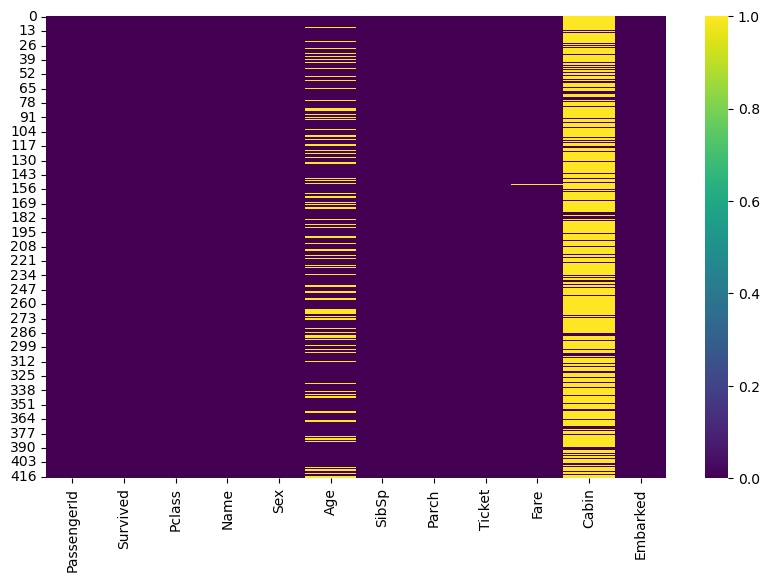

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [11]:
df.describe(include='O').T

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


In [12]:
object_col = df.select_dtypes(include='object').columns
object_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [13]:
for col in object_col:
    print('--'*16)
    print(df[col].value_counts(dropna=False))  # with dropna=False, strange values can be detected.
    print('--'*16)

--------------------------------
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: Name, Length: 418, dtype: int64
--------------------------------
--------------------------------
male      266
female    152
Name: Sex, dtype: int64
--------------------------------
--------------------------------
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64
--------------------------------
--------------------------------
NaN                327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
       

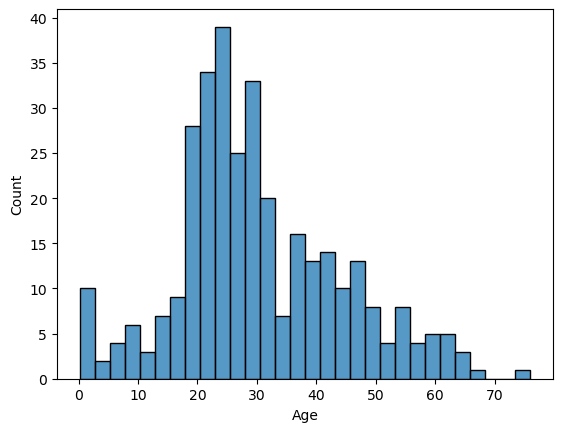

In [14]:
sns.histplot(data=df,x=df['Age'],kde=False,bins=30);

In [15]:
df.Age.mean()

30.272590361445783

In [16]:
df.Age.median()

27.0

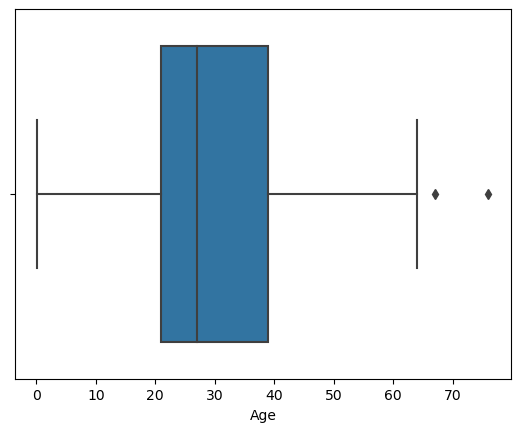

In [17]:
sns.boxplot(data=df, x='Age');

In [18]:
df.groupby('Pclass').Age.median()

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

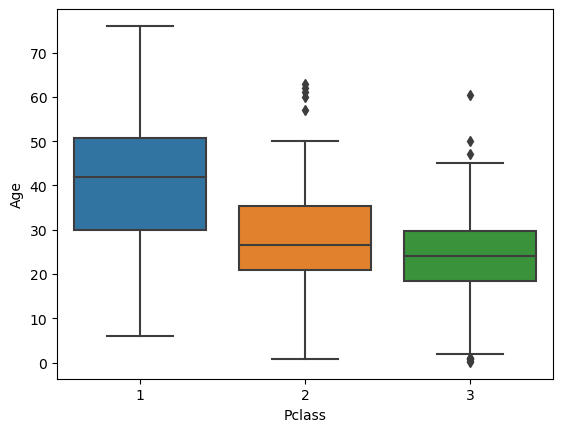

In [19]:
sns.boxplot(data=df,x='Pclass',y='Age');

In [20]:
df.groupby(['Pclass','Sex']).Age.median()

Pclass  Sex   
1       female    41.0
        male      42.0
2       female    24.0
        male      28.0
3       female    22.0
        male      24.0
Name: Age, dtype: float64

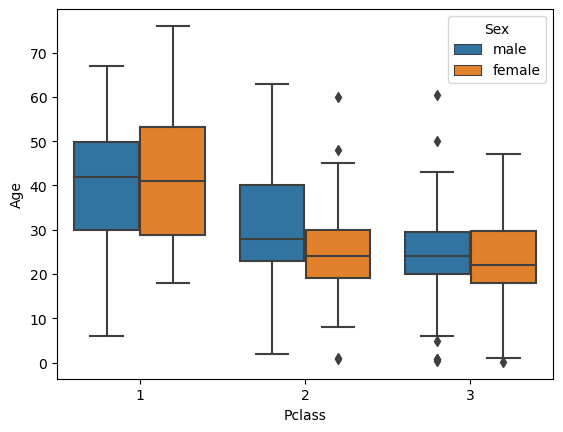

In [21]:
sns.boxplot(data=df,x='Pclass',y='Age',hue='Sex');

In [22]:
df.groupby(['Pclass','Sex']).Age.transform('median')

0      24.0
1      22.0
2      28.0
3      24.0
4      22.0
       ... 
413    24.0
414    41.0
415    24.0
416    24.0
417    24.0
Name: Age, Length: 418, dtype: float64

In [23]:
df['Age'] = df['Age'].fillna(df.groupby(['Pclass','Sex']).Age.transform('median'))

In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
df.drop('Cabin',axis=1,inplace=True)

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

df.dropna(inplace=True)

In [28]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [29]:
df.Survived.value_counts(normalize=True)


0    0.636364
1    0.363636
Name: Survived, dtype: float64

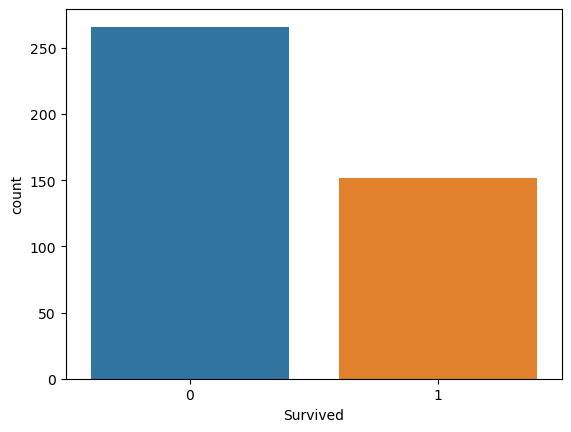

In [30]:
sns.countplot(data=df,x='Survived');

In [31]:
df.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           152
male    0           266
Name: Survived, dtype: int64

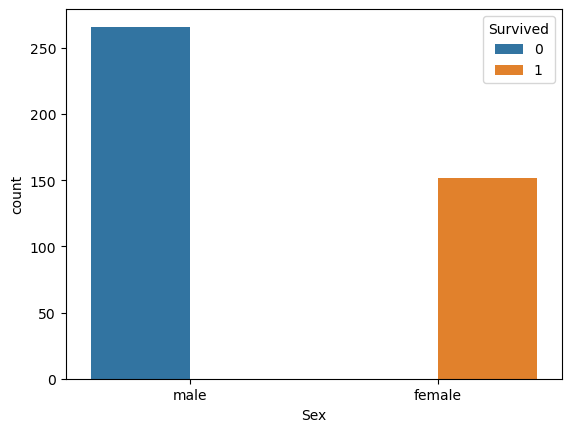

In [32]:
sns.countplot(data=df,x='Sex',hue='Survived');


In [33]:
df.groupby('Sex').Survived.value_counts(normalize=True)

Sex     Survived
female  1           1.0
male    0           1.0
Name: Survived, dtype: float64

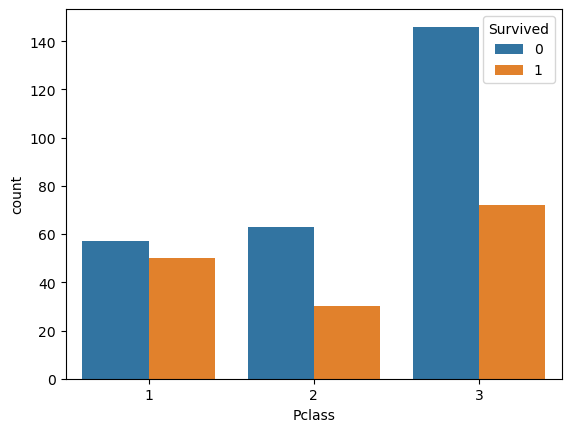

In [34]:
sns.countplot(data=df, x='Pclass', hue='Survived');

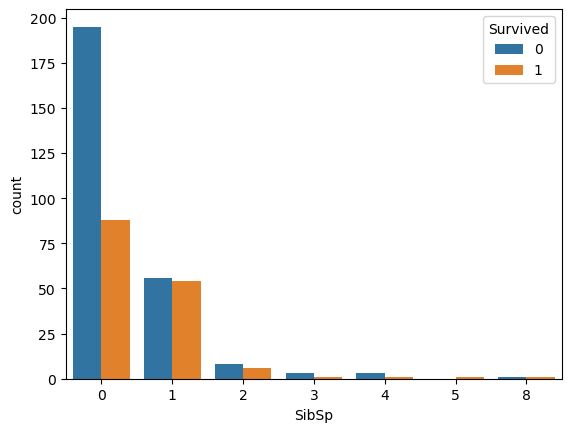

In [35]:
sns.countplot(data=df,x='SibSp',hue='Survived');

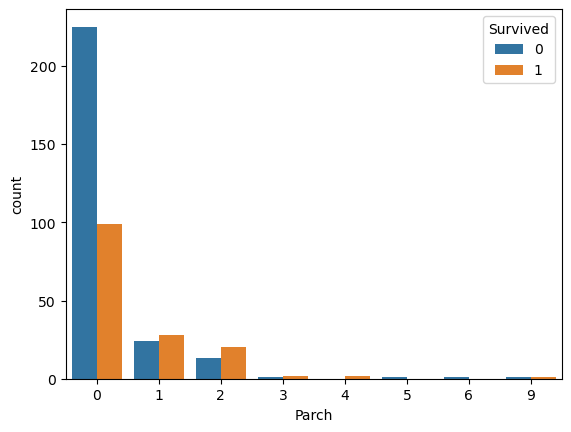

In [36]:
sns.countplot(data=df, x='Parch',hue='Survived');

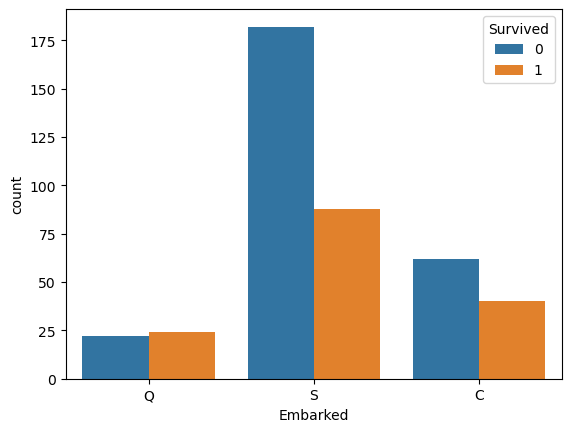

In [37]:
sns.countplot(data=df, x='Embarked',hue='Survived');

In [38]:
df.groupby('Survived').Age.median()

Survived
0    25.0
1    24.0
Name: Age, dtype: float64

In [39]:
df.groupby('Survived').Age.mean()

Survived
0    29.368083
1    29.174934
Name: Age, dtype: float64

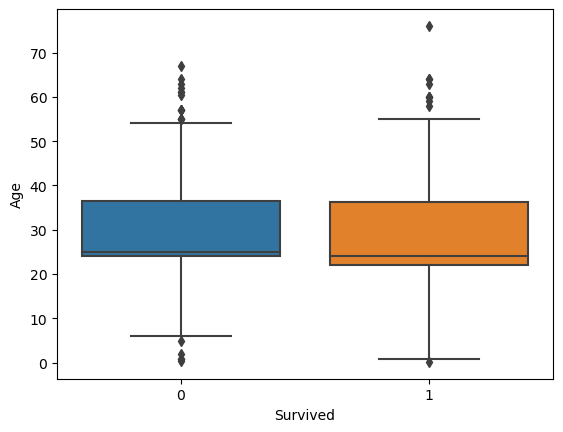

In [40]:
sns.boxplot(data=df,x='Survived',y='Age');

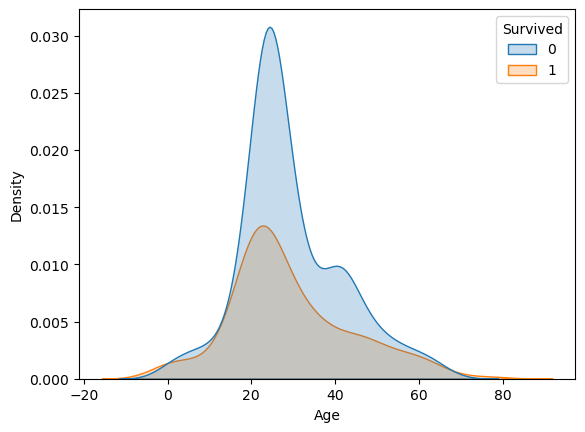

In [41]:
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True);

In [42]:
df.groupby('Survived').Fare.median()

Survived
0    13.0000
1    21.5125
Name: Fare, dtype: float64

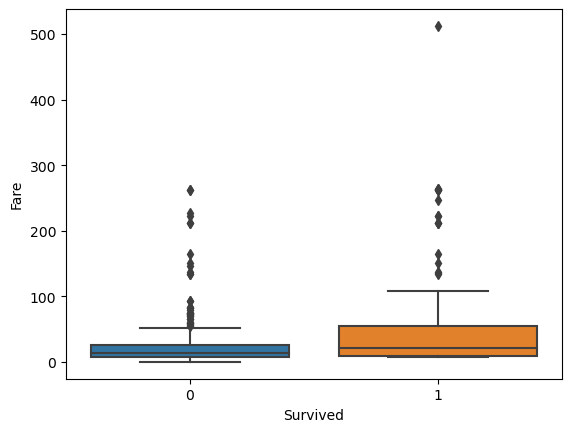

In [43]:
sns.boxplot(data=df, x='Survived',y='Fare');

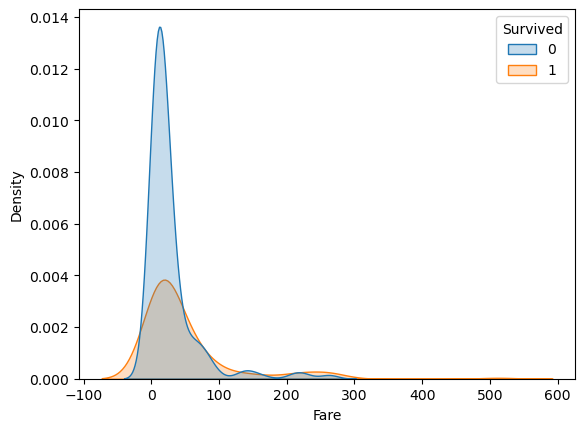

In [44]:
sns.kdeplot(data=df, x='Fare', hue='Survived', fill=True);

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [46]:
ticket = df.Ticket.value_counts(dropna=False)
ticket

PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64

In [47]:
ticket[ticket!=1]

PC 17608              5
CA. 2343              4
113503                4
PC 17483              3
220845                3
347077                3
SOTON/O.Q. 3101315    3
C.A. 31029            3
16966                 3
230136                2
C.A. 33112            2
28220                 2
PC 17756              2
29103                 2
347072                2
W./C. 6607            2
CA 31352              2
CA 2144               2
2660                  2
112378                2
13508                 2
13695                 2
113781                2
315153                2
19950                 2
2650                  2
F.C.C. 13534          2
350405                2
C.A. 2315             2
13236                 2
24065                 2
A/5. 851              2
21228                 2
2662                  2
C 4001                2
11778                 2
33638                 2
12749                 2
36928                 2
13050                 2
S.O./P.P. 2           2
S.O.C. 14879    

In [48]:
group_list = list(ticket[ticket!=1].index)
group_list

['PC 17608',
 'CA. 2343',
 '113503',
 'PC 17483',
 '220845',
 '347077',
 'SOTON/O.Q. 3101315',
 'C.A. 31029',
 '16966',
 '230136',
 'C.A. 33112',
 '28220',
 'PC 17756',
 '29103',
 '347072',
 'W./C. 6607',
 'CA 31352',
 'CA 2144',
 '2660',
 '112378',
 '13508',
 '13695',
 '113781',
 '315153',
 '19950',
 '2650',
 'F.C.C. 13534',
 '350405',
 'C.A. 2315',
 '13236',
 '24065',
 'A/5. 851',
 '21228',
 '2662',
 'C 4001',
 '11778',
 '33638',
 '12749',
 '36928',
 '13050',
 'S.O./P.P. 2',
 'S.O.C. 14879']

In [49]:
True*1

1

In [50]:
False*1

0

In [51]:
df['is_group'] = df.Ticket.isin(group_list)*1
df['is_group']

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: is_group, Length: 418, dtype: int32

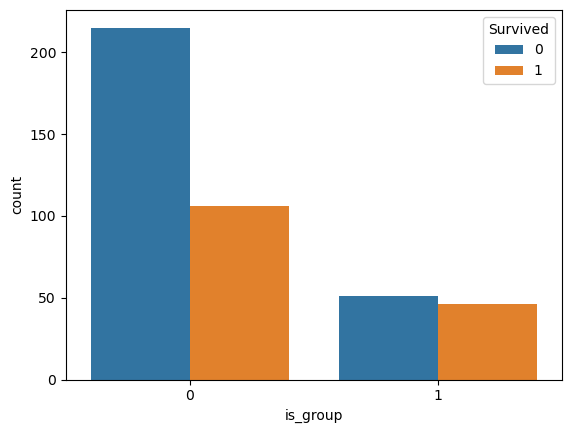

In [52]:
sns.countplot(data=df, x='is_group',hue='Survived');

In [53]:
df.SibSp

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    0
415    0
416    0
417    1
Name: SibSp, Length: 418, dtype: int64

In [54]:
df.Parch

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    0
415    0
416    0
417    1
Name: Parch, Length: 418, dtype: int64

In [55]:
df['is_alone'] =((df.SibSp == 0) & (df.Parch == 0))*1
df.is_alone

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    1
415    1
416    1
417    0
Name: is_alone, Length: 418, dtype: int32

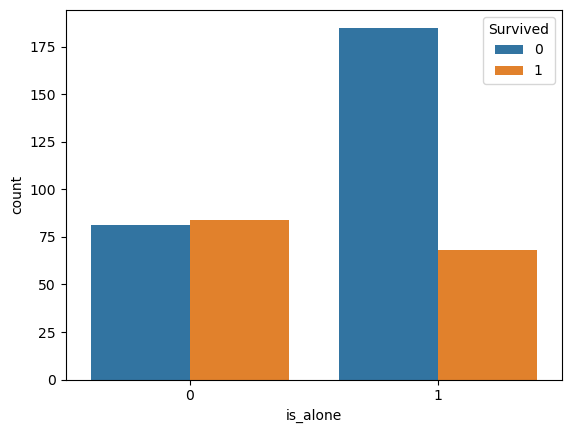

In [56]:
sns.countplot(data=df, x='is_alone',hue='Survived');

In [57]:
df.groupby('is_group').is_alone.value_counts()

is_group  is_alone
0         1           232
          0            89
1         0            76
          1            21
Name: is_alone, dtype: int64

In [58]:
df.Name

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [59]:
df.Name.sample(10)

168    Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...
371                            Wilson, Miss. Helen Alice
133                                Thomas, Mr. Charles P
249            Khalil, Mrs. Betros (Zahie Maria" Elias)"
262    Wells, Mrs. Arthur Henry (Addie" Dart Trevaskis)"
330    Davies, Mrs. John Morgan (Elizabeth Agnes Mary...
369                        Pallas y Castello, Mr. Emilio
244            Johnston, Master. William Arthur Willie""
399                             Conlon, Mr. Thomas Henry
175                            Brown, Miss. Edith Eileen
Name: Name, dtype: object

In [60]:
df.Name.str.split(',').str[1].str.split("(").str[0].str.split('"').str[0].str.split('.').str[1].str.strip()

0                James
1                James
2       Thomas Francis
3               Albert
4            Alexander
            ...       
413              Woolf
414            Fermina
415    Simon Sivertsen
416          Frederick
417          Michael J
Name: Name, Length: 418, dtype: object

In [61]:
df.Name.str.extract("\w+\.\s(\w*\s*\w*)" )

,0
0,James
1,James
2,Thomas Francis
3,Albert
4,Alexander
...,...
413,Woolf
414,Fermina
415,Simon Sivertsen
416,Frederick


In [62]:
df['Name'] =  df.Name.str.extract("\w+\.\s(\w*\s*\w*)" )
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group,is_alone
0,892,0,3,James,male,34.5,0,0,330911,7.8292,Q,0,1
1,893,1,3,James,female,47.0,1,0,363272,7.0000,S,0,0
2,894,0,2,Thomas Francis,male,62.0,0,0,240276,9.6875,Q,0,1
3,895,0,3,Albert,male,27.0,0,0,315154,8.6625,S,0,1
4,896,1,3,Alexander,female,22.0,1,1,3101298,12.2875,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,Woolf,male,24.0,0,0,A.5. 3236,8.0500,S,0,1
414,1306,1,1,Fermina,female,39.0,0,0,PC 17758,108.9000,C,0,1
415,1307,0,3,Simon Sivertsen,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,1
416,1308,0,3,Frederick,male,24.0,0,0,359309,8.0500,S,0,1


In [63]:
df.Ticket.str.extract("(\d*)$")

,0
0,330911
1,363272
2,240276
3,315154
4,3101298
...,...
413,3236
414,17758
415,3101262
416,359309


In [64]:
df["Ticket"] = df.Ticket.str.extract("(\d*)$")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group,is_alone
0,892,0,3,James,male,34.5,0,0,330911,7.8292,Q,0,1
1,893,1,3,James,female,47.0,1,0,363272,7.0000,S,0,0
2,894,0,2,Thomas Francis,male,62.0,0,0,240276,9.6875,Q,0,1
3,895,0,3,Albert,male,27.0,0,0,315154,8.6625,S,0,1
4,896,1,3,Alexander,female,22.0,1,1,3101298,12.2875,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,Woolf,male,24.0,0,0,3236,8.0500,S,0,1
414,1306,1,1,Fermina,female,39.0,0,0,17758,108.9000,C,0,1
415,1307,0,3,Simon Sivertsen,male,38.5,0,0,3101262,7.2500,S,0,1
416,1308,0,3,Frederick,male,24.0,0,0,359309,8.0500,S,0,1


In [65]:
df_final = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_group,is_alone
0,0,3,male,34.5,0,0,7.8292,Q,0,1
1,1,3,female,47.0,1,0,7.0000,S,0,0
2,0,2,male,62.0,0,0,9.6875,Q,0,1
3,0,3,male,27.0,0,0,8.6625,S,0,1
4,1,3,female,22.0,1,1,12.2875,S,0,0
...,...,...,...,...,...,...,...,...,...,...
413,0,3,male,24.0,0,0,8.0500,S,0,1
414,1,1,female,39.0,0,0,108.9000,C,0,1
415,0,3,male,38.5,0,0,7.2500,S,0,1
416,0,3,male,24.0,0,0,8.0500,S,0,1


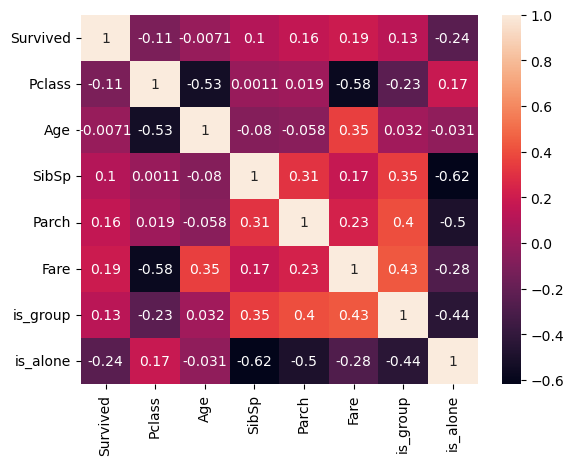

In [66]:
sns.heatmap(df_final.corr(), annot=True);

In [67]:
df_final = df_final.drop(["SibSp", "Parch"], axis=1)
df_final

,Survived,Pclass,Sex,Age,Fare,Embarked,is_group,is_alone
0,0,3,male,34.5,7.8292,Q,0,1
1,1,3,female,47.0,7.0000,S,0,0
2,0,2,male,62.0,9.6875,Q,0,1
3,0,3,male,27.0,8.6625,S,0,1
4,1,3,female,22.0,12.2875,S,0,0
...,...,...,...,...,...,...,...,...
413,0,3,male,24.0,8.0500,S,0,1
414,1,1,female,39.0,108.9000,C,0,1
415,0,3,male,38.5,7.2500,S,0,1
416,0,3,male,24.0,8.0500,S,0,1


In [68]:
df_dummy = pd.get_dummies(data=df_final, drop_first=True)
df_dummy

,Survived,Pclass,Age,Fare,is_group,is_alone,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,7.8292,0,1,1,1,0
1,1,3,47.0,7.0000,0,0,0,0,1
2,0,2,62.0,9.6875,0,1,1,1,0
3,0,3,27.0,8.6625,0,1,1,0,1
4,1,3,22.0,12.2875,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,24.0,8.0500,0,1,1,0,1
414,1,1,39.0,108.9000,0,1,0,0,0
415,0,3,38.5,7.2500,0,1,1,0,1
416,0,3,24.0,8.0500,0,1,1,0,1


In [69]:
df_dummy = pd.get_dummies(data=df_dummy, columns=["Pclass"], drop_first=True)
df_dummy

,Survived,Age,Fare,is_group,is_alone,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,34.5,7.8292,0,1,1,1,0,0,1
1,1,47.0,7.0000,0,0,0,0,1,0,1
2,0,62.0,9.6875,0,1,1,1,0,1,0
3,0,27.0,8.6625,0,1,1,0,1,0,1
4,1,22.0,12.2875,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
413,0,24.0,8.0500,0,1,1,0,1,0,1
414,1,39.0,108.9000,0,1,0,0,0,0,0
415,0,38.5,7.2500,0,1,1,0,1,0,1
416,0,24.0,8.0500,0,1,1,0,1,0,1
